This is a coding to test diverse models in classifying mushrooms into poisonous  and edible. This aims to demonstrate the basic pipeline in machine learning models building 

In [4]:
# importing all necessary modules

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv ('mushrooms.csv')

data.head ()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
class_count = data['class'].value_counts ()
class_count

e    4208
p    3916
Name: class, dtype: int64

<BarContainer object of 1 artists>

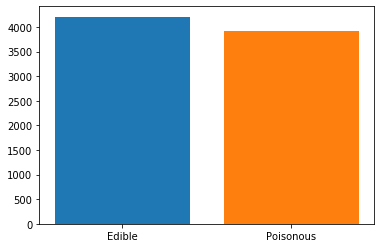

In [6]:
# Displaying the values of the class in bar chart

plt.bar ('Edible', class_count ['e'])
plt.bar ('Poisonous', class_count ['p'])

In [10]:
# diving our data into various parts to be used

x = data.loc [:, ['cap-shape', 'cap-color', 'ring-number', 'ring-type']]
y = data.loc [:, 'class']

# transforming all the data to integers able to be performed mathematical operations on

encoder = LabelEncoder ()

# using a loop to iterate the values of x since there are multiple columns

for i in x.columns:
    x[i] = encoder.fit_transform (x[i])

y = encoder.fit_transform (y)

In [11]:
x

,cap-shape,cap-color,ring-number,ring-type
0,5,4,1,4
1,5,9,1,4
2,0,8,1,4
3,5,8,1,4
4,5,3,1,0
...,...,...,...,...
8119,3,4,1,4
8120,5,4,1,4
8121,2,4,1,4
8122,3,4,1,0


In [12]:
# splitting our data getting ready to build our model 

x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.3)

In [14]:
# building machine models

logistic_model = LogisticRegression ()
ridge_model = RidgeClassifier ()
tree_model = DecisionTreeClassifier ()
gaussian_model = GaussianNB ()
neural_model = MLPClassifier ()


In [15]:
# training the data using the diverse models

logistic_model.fit (x_train, y_train)
ridge_model.fit (x_train, y_train)
tree_model.fit (x_train, y_train)
gaussian_model.fit (x_train, y_train)
neural_model.fit (x_train, y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [16]:
logistic_model_pred = logistic_model.predict (x_test)
ridge_model_pred = ridge_model.predict (x_test)
tree_model_pred = tree_model.predict (x_test)
gaussian_model_pred = gaussian_model.predict (x_test)
neural_model_pred = neural_model.predict (x_test)

In [18]:
# creating a classification report

logistic_report = classification_report (y_test, logistic_model_pred)
ridge_report = classification_report (y_test, ridge_model_pred)
tree_report = classification_report (y_test, tree_model_pred)
gaussian_report = classification_report (y_test, gaussian_model_pred)
neural_report = classification_report (y_test, gaussian_model_pred)

# printing the classification report

print ('******* Logistic Regression Model *******')
print (logistic_report)

print ('******* Ridge Classifier Model Report *******')
print (ridge_report)

print ('******* Decision Tree Model *******')
print (tree_report)

print ('******* Naive Bayes Gaussian Report *******')
print (gaussian_report)

print ('******* Neural Network Moel Report *******')
print (neural_report)

******* Logistic Regression Model *******
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1266
           1       0.78      0.78      0.78      1172

    accuracy                           0.79      2438
   macro avg       0.79      0.79      0.79      2438
weighted avg       0.79      0.79      0.79      2438

******* Ridge Classifier Model Report *******
              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1266
           1       0.78      0.78      0.78      1172

    accuracy                           0.79      2438
   macro avg       0.79      0.79      0.79      2438
weighted avg       0.79      0.79      0.79      2438

******* Decision Tree Model *******
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1266
           1       0.88      0.91      0.89      1172

    accuracy                           0.90      2438
   m

In [19]:
# Decision Tree has the best model. since the model is the best, lets try and see if the RandomForest model will give us a better result


random_model = RandomForestClassifier ()

random_model.fit (x_train, y_train)
random_pred = random_model.predict (x_test)

random_report = classification_report (y_test, random_pred)

print ('******* Random Forest Forest *******')
print (random_report)

******* Random Forest Forest *******
              precision    recall  f1-score   support

           0       0.91      0.88      0.90      1266
           1       0.88      0.91      0.89      1172

    accuracy                           0.90      2438
   macro avg       0.90      0.90      0.90      2438
weighted avg       0.90      0.90      0.90      2438

